In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [14]:
df = pd.read_csv('fcc-forum-pageviews.csv',index_col="date"
                 ,parse_dates=True)

In [9]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [15]:
low_views=df['value'].quantile(0.025)
high_views=df['value'].quantile(0.975)
df = df[(df['value']>low_views) & (df['value']<high_views)]

In [11]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

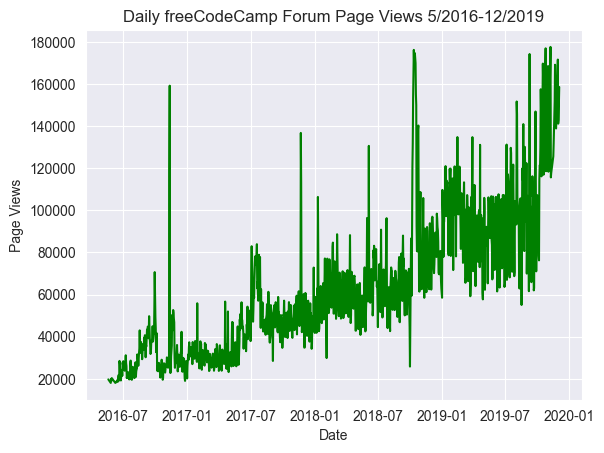

In [20]:
xpoints=df.index
ypoints=df['value']
plt.plot(xpoints,ypoints,color='green')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

In [30]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date")
months=[]
years=[]
for x in df.index:
    parts=x.split('-')
    months.append(parts[1])
    years.append(parts[0])
data={
    "years": years,
    "months": months,
    "value": df['value'].values
}
df_bar=pd.DataFrame(data)

In [31]:
df_bar

,years,months,value
0,2016,05,1201
1,2016,05,2329
2,2016,05,1716
3,2016,05,10539
4,2016,05,6933
...,...,...,...
1299,2019,11,171584
1300,2019,11,141161
1301,2019,12,142918
1302,2019,12,220144


In [34]:
df_bar['average']=df_bar.groupby(['years', 'months'])['value'].transform('mean')

In [35]:
df_bar

,years,months,value,average
0,2016,05,1201,11242.695652
1,2016,05,2329,11242.695652
2,2016,05,1716,11242.695652
3,2016,05,10539,11242.695652
4,2016,05,6933,11242.695652
...,...,...,...,...
1299,2019,11,171584,181026.700000
1300,2019,11,141161,181026.700000
1301,2019,12,142918,173870.333333
1302,2019,12,220144,173870.333333


In [43]:
 df_grouped = df_bar.groupby(['years', 'months'])['value'].mean().unstack()

In [45]:
df_grouped

months,01,02,03,04,05,06,07,08,09,10,11,12
years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333


Text(0, 0.5, 'Average Page Views')

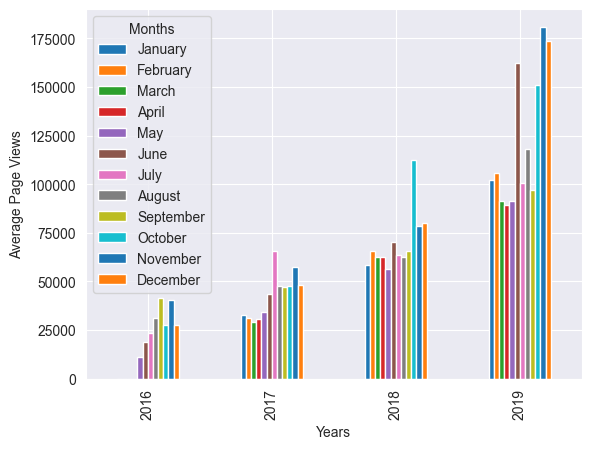

In [54]:
fig=df_grouped.plot(kind='bar').figure
month_names = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]
plt.legend(title="Months", labels=month_names)
plt.xlabel("Years")
plt.ylabel("Average Page Views")

In [58]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date"
                     , parse_dates=True)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [59]:
df_box

,date,value,year,month
0,2016-05-09,1201,2016,May
1,2016-05-10,2329,2016,May
2,2016-05-11,1716,2016,May
3,2016-05-12,10539,2016,May
4,2016-05-13,6933,2016,May
...,...,...,...,...
1299,2019-11-29,171584,2019,Nov
1300,2019-11-30,141161,2019,Nov
1301,2019-12-01,142918,2019,Dec
1302,2019-12-02,220144,2019,Dec


Text(0, 0.5, 'Page Views')

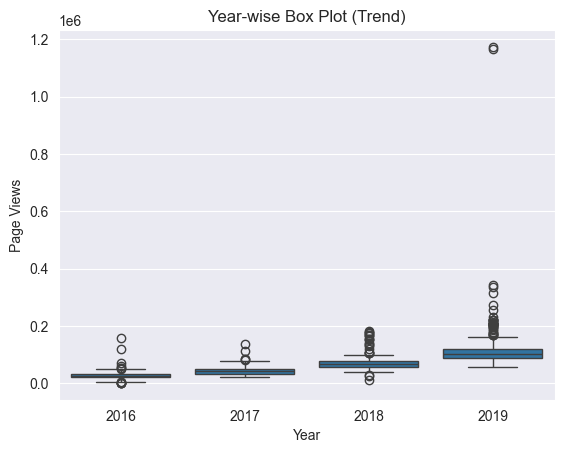

In [73]:
sns.boxplot(data=df_box, x="year", y="value")
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel("Year")
plt.ylabel("Page Views")

Text(0, 0.5, 'Page Views')

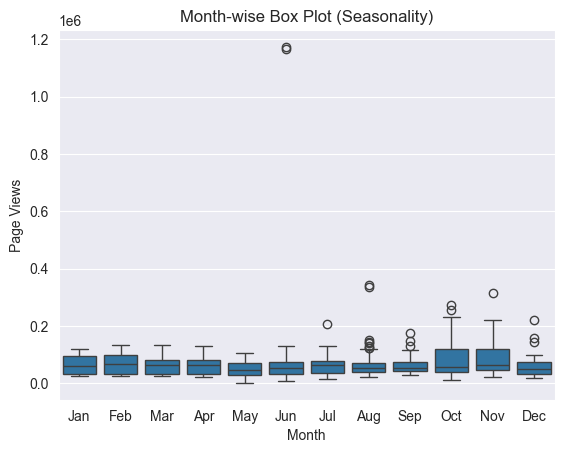

In [74]:
sns.boxplot(data=df_box, x="month", y="value", order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel("Month")
plt.ylabel("Page Views")

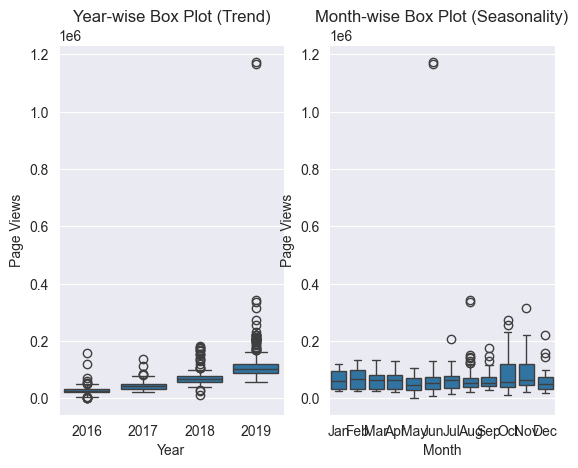

In [76]:
plt.subplot(1,2,1)
sns.boxplot(data=df_box, x="year", y="value")
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel("Year")
plt.ylabel("Page Views")
plt.subplot(1,2,2)
sns.boxplot(data=df_box, x="month", y="value",
                    order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel("Month")
plt.ylabel("Page Views")
fig = plt.gcf()